In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TD Éclairage Public 2
## Calcul de l’indice d’éblouissement TI

**2.1 Données de l'installation**

On considère un observateur $O$ roulant sur une voie de circulation. Il est positionné à $1.5 m$ du bord de la chaussée. On calculera l’indice $TI$ selon la prescription de la norme EN 13201.

On donne :

<img src="Figure_Luminaire.png" width="300"/>

- Hauteur de feu : $H=7 m$
- Coordonnées de l’observateur : $O=[ Ox=1.5, Oy= 0 , Oz=1.5 ]$
- Inter-distance des mâts : $e=4H=28 m$
- Luminance moyen de la chaussée : $L̄=1 cd.m^{−2}$
- Direction du regard : $α =1°$ sous l’horizontale
- Angle de déﬁlement du luminaire : $γmax =75°$
- Nb de luminaires sur $500 m$ : $k= 500/4H=17$ luminaires

Rappel de cours : La luminance de voile d’un luminaire est donnée par :

$$L v_{i}=9.86*{\Biggl({1+\Biggl({\frac{23}{66.4}}\Biggr)^{4}}}{\Biggr)}{\frac{E_{i}}{\theta_{i}^{2}}}$$

où l’angle $θ$ est exprimé en degré. Et, l’indice $TI$ se calcul par :

$$ TI = 65 \frac{L_v}{L̄^{0.8}}

**2.2 Calcul des angles θ et γ.**

1. Calculez la position du point de visée P=[ Px,Py,Pz ]
2. Exprimez les coordonnées Li =[Lx,Ly,Lz ] de la source du luminaire n°i en fonction de la hauteur de feu H, inter-distance e et de l’index i du luminaire
43. Exprimez l’angle $θ_i$ entre la direction du luminaire Li et la direction de visée
4. Calculer l’angle $γ_i$ entre la verticale et la direction (luminaire Li -Observateur)

In [2]:
# Constantes
H = 7
C_o = np.array([1.5, 0, 1.5])
inter_e = 4 * H
Lum_chaus = 1
alpha = 1       # Degrés
gamma_max = 75
distance_etude = 500
N = int(np.floor(distance_etude / (4 * H)))
# Intensité isotrope lumineuse : 
I_0 = 2200 # candelas

1. Point de visé :

$ P_x = C_{0}(x) $

$ P_y = \frac{1.5}{\tan{\alpha}} $

$ P_z = 0 $

In [3]:
def pointP(C_o, alpha):
    return np.array([C_o[0], 1.5 / np.tan((np.pi / 180) * alpha), 0])

P = pointP(C_o, alpha)
print(P)

[ 1.5        85.93494245  0.        ]


2. Coordonnées $L_i$ des luminaires :

In [4]:
L = np.array([])        # Coordonnées des luminaires
OL = np.array([])       # Vecteur Observateur-Luminaires
Uz = np.array([0, 0, -1])
OP = np.array([P[0] - C_o[0], P[1] - C_o[1], P[2] - C_o[2]])

# This function compute the L coordinates
def fn_L_coord(i, H, inter_e):
    Lx = 0
    Ly = 2.75 * (H - 1.5) + i * inter_e
    Lz = H
    L_int = np.array([Lx, Ly, Lz])
    return L_int

# This function compute the OL vector
def fn_OL(i, L_int, C_o):
    return np.array([L_int[0] - C_o[0], L_int[1] - C_o[1], L_int[2] - C_o[2]])

# We iterate through all the street lights and fill the L and OL arrays
for i in range(N):
    L_int = fn_L_coord(i, H, inter_e)      
    L = np.append(L, L_int)

    OL_int = fn_OL(i, L_int, C_o)
    OL = np.append(OL, OL_int)
    

3. & 4. Angle $\theta_i$ et $\gamma_i$ :

In [5]:
theta_i = np.array([])      # Theta in degrees
gamma_i = np.array([])      # Gamma in degrees

# This function compute the theta angle in degrees
def fn_theta(OP, OL_int):
    return np.arccos(np.dot(OL_int, OP) / (np.linalg.norm(OP) * np.linalg.norm(OL_int))) * 180 / np.pi

# This function compute the gamma angle in degrees
def fn_gamma(OL_int, Uz):
    return np.arccos(np.dot(-OL_int, Uz) / (np.linalg.norm(OL_int) * np.linalg.norm(-Uz))) * 180 / np.pi

for i in range(N):
    L_int = L[i * 3 : i * 3 + 3]
    OL_int = OL[i * 3 : i * 3 + 3]

    theta = fn_theta(OP, OL_int)
    theta_i = np.append(theta_i, theta)

    gamma = fn_gamma(OL_int, Uz)
    gamma_i = np.append(gamma_i, gamma)

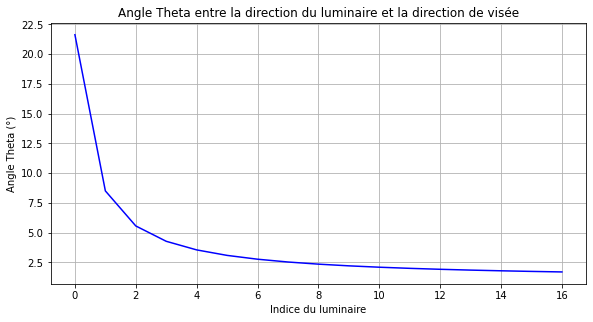

In [6]:
plt.figure(figsize= (6.4 * 1.5, 4.8 * 1))
plt.plot(theta_i, color="blue")
plt.grid()
plt.title("Angle Theta entre la direction du luminaire et la direction de visée")
plt.xlabel("Indice du luminaire")
plt.ylabel("Angle Theta (°)")
plt.show()

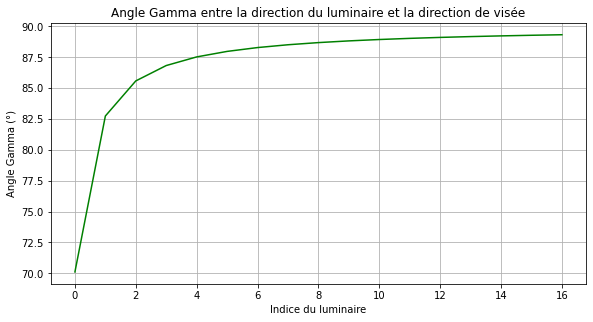

In [7]:
plt.figure(figsize= (6.4 * 1.5, 4.8 * 1))
plt.plot(gamma_i, color="green")
plt.grid()
plt.title("Angle Gamma entre la direction du luminaire et la direction de visée")
plt.xlabel("Indice du luminaire")
plt.ylabel("Angle Gamma (°)")
plt.show()

**2.3 Distribution d’intensité isotrope**

On considère le cas d’une distribution intensité lumineuse isotrope égale à 2200 cd. On reprendra les résultats valides établis aux questions précédentes.

1. Exprimez l’éclairement Ei sur la pupille de l’observateur résultant du luminaire i.
2. Exprimez la luminance de voile Lvi produite par le luminaire i
3. Calculez la luminances de voile résultante : $Lv = \sum^k_1 Lv_i$
4. Calculez le TI de l’installation

1. Eclairement $E_i$ :

$ E_i = \frac{I(\gamma_i) \cdot cos(\theta_i)}{d_i^2} = \frac{I0 \cdot cos(\theta_i)}{d_i^2}$ 

Avec $d_i$ la norme de $\overrightarrow{L_i O}$

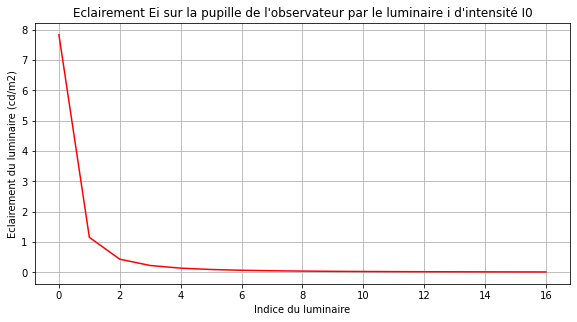

In [8]:
E_i = np.array([])

def fn_eclairement(I, theta, OL_int):
    # Theta needs to be in radians
    return I * np.cos(theta / 180 * np.pi) / (np.linalg.norm(-OL_int)**2)

for i in range(int(N)):
    L_int = L[i * 3 : i * 3 + 3]
    OL_int = OL[i * 3 : i * 3 + 3]
    
    E_i = np.append(E_i, fn_eclairement(I_0, theta_i[i], OL_int))

plt.figure(figsize= (6.4 * 1.5, 4.8 * 1))
plt.plot(E_i, color="red")
plt.grid()
plt.title("Eclairement Ei sur la pupille de l'observateur par le luminaire i d'intensité I0") 
plt.xlabel("Indice du luminaire")
plt.ylabel("Eclairement du luminaire (cd/m2)")
plt.show()

2.2 Luminance de voile $L_{vi}$ :

$L v_{i}=9.86*{\Biggl({1+\Biggl({\frac{23}{66.4}}\Biggr)^{4}}}{\Biggr)}{\frac{E_{i}}{\theta_{i}^{2}}}$

In [9]:
L_vi = np.array([])

for i in range(N):
    L_v = (9.86 * (1 + (23 / 66.4) ** 4)) * (E_i[i] / theta_i[i]**2)
    L_vi = np.append(L_vi, L_v)

3. Calculez la luminances de voile résultante : $Lv = \sum^k_1 Lv_i$

In [10]:
L_vtotale = np.sum(L_vi)
print(L_vtotale)

1.4098671629267787


4. Calculez le TI de l’installation

In [11]:
TI = 65 * L_vtotale / (Lum_chaus ** 0.8)
print(TI)

91.64136559024061


**2.4 Distribution d’intensité déﬁlée**

On considère le cas ou les intensités précédentes présentant un angle de plus de 75° par rapport à la verticale sont déﬁlées : $I(γ) = 0$ si $γ >75°$ , et $I(γ) = I0$ sinon .
1. Exprimez l’éclairement Ei sur la pupille de l’observateur résultant du luminaire i ;
2. Calculez les luminances de voile Lvi des premiers luminaires ;
3. Calculez la luminance de voile résultante ;
4. Calculez le TI de l’installation .

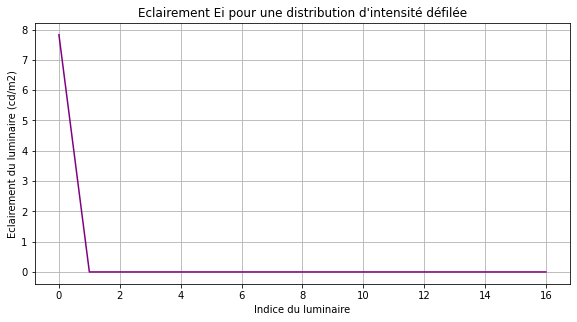

In [12]:
def fn_intensite_defilee (gamma_deg):
    if gamma_deg > 75 :
        return 0
    else :
        return I_0

for i in range(int(N)):
    OL_int = OL[i * 3 : i * 3 + 3]
    
    I_int = fn_intensite_defilee(gamma_i[i])
    E_i[i] = fn_eclairement(I_int, theta_i[i], OL_int)

plt.figure(figsize= (6.4 * 1.5, 4.8 * 1))
plt.plot(E_i, color="purple")
plt.grid()
plt.title("Eclairement Ei pour une distribution d'intensité défilée") 
plt.xlabel("Indice du luminaire")
plt.ylabel("Eclairement du luminaire (cd/m2)")
plt.show()

2. Calculez les luminances de voile Lvi des premiers luminaires ;

In [13]:
for i in range(N):
    L_v = (9.86 * (1 + (23 / 66.4) ** 4)) * (E_i[i] / theta_i[i]**2)
    L_vi[i] = L_v

3. Calculez la luminance de voile résultante ;

In [14]:
L_vtotale = np.sum(L_vi)
print(L_vtotale)

0.16752994159115572


4. Calculez le TI de l’installation .

In [15]:
TI = 65 * L_vtotale / (Lum_chaus ** 0.8)
print(TI)

10.889446203425122


**2.5 Distribution d’intensité lambertienne.**

On considère le cas ou les intensités $I = I_0 \cdot cos(\gamma$) . On reprendra les résultats valides établis aux
questions précédentes.
1. Exprimez l’éclairement Ei sur la pupille de l’observateur résultant du iieme luminaire ;
2. Exprimez la luminance de voile Lvi produite par le iieme luminaire ;
3. Calculez la luminance de voile résultante ;
4. Calculez le TI de l’installation.

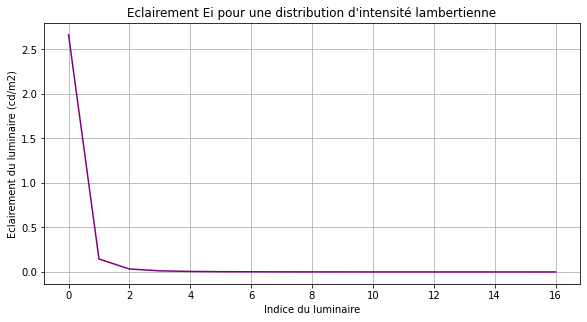

In [16]:
def fn_intensite_lambertienne (gamma_deg):
    return I_0 * np.cos(gamma_deg * np.pi / 180) # Gamma needs to be in radians

for i in range(int(N)):
    OL_int = OL[i * 3 : i * 3 + 3]

    I_int = fn_intensite_lambertienne(gamma_i[i])
    E_i[i] = fn_eclairement(I_int, theta_i[i], OL_int)

plt.figure(figsize= (6.4 * 1.5, 4.8 * 1))
plt.plot(E_i, color="purple")
plt.grid()
plt.title("Eclairement Ei pour une distribution d'intensité lambertienne") 
plt.xlabel("Indice du luminaire")
plt.ylabel("Eclairement du luminaire (cd/m2)")
plt.show()

2. Exprimez la luminance de voile Lvi produite par le iieme luminaire ;

In [17]:
for i in range(N):
    L_v = (9.86 * (1 + (23 / 66.4) ** 4)) * (E_i[i] / theta_i[i]**2)
    L_vi[i] = L_v

3. Calculez la luminance de voile résultante ;

In [18]:
L_vtotale = np.sum(L_vi)
print(L_vtotale)

0.11511674744942331


4. Calculez le TI de l’installation.

In [19]:
TI = 65 * L_vtotale / (Lum_chaus ** 0.8)
print(TI)

7.4825885842125155
